In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from ngboost import NGBRegressor
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import euclidean_distances
from scipy.spatial.distance import cdist
from scipy.stats import pearsonr


In [3]:
# Load and pre-process the dataset
file_path = 'dataset.csv'
data = pd.read_csv(file_path)


#removing categorical columns
data = data.drop(columns=["type"])  # Drop the categorical attribute
X = data.drop(columns=["quality"])  # Features
y = data["quality"]                 # Target variable
print(data.head())
#scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

#store the scaled dataset
dataset_scaled = pd.concat([X_scaled, y], axis=1)
dataset_scaled.to_csv('dataset_scaled.csv', index=False)

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6 

In [4]:
#applying PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)
X_pca = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2', 'PCA3'])
dataset_processed = pd.concat([X_pca, y], axis=1)
dataset_processed.to_csv('dataset_processed.csv', index=False)

In [5]:
#splitting the datasets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42)

[iter 0] loss=1.2911 val_loss=0.0000 scale=1.0000 norm=0.9201
[iter 100] loss=1.1191 val_loss=0.0000 scale=1.0000 norm=0.7968
[iter 200] loss=1.0461 val_loss=0.0000 scale=1.0000 norm=0.7723
[iter 300] loss=1.0051 val_loss=0.0000 scale=1.0000 norm=0.7622
[iter 400] loss=0.9783 val_loss=0.0000 scale=1.0000 norm=0.7567


/var/folders/zq/p5sg25qs4rzb2jlzpff4hk940000gn/T/ipykernel_55014/2778736469.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='RMSE', y='Model', data=regression_analysis, palette='viridis')
/var/folders/zq/p5sg25qs4rzb2jlzpff4hk940000gn/T/ipykernel_55014/2778736469.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='MAE', y='Model', data=regression_analysis, palette='viridis')


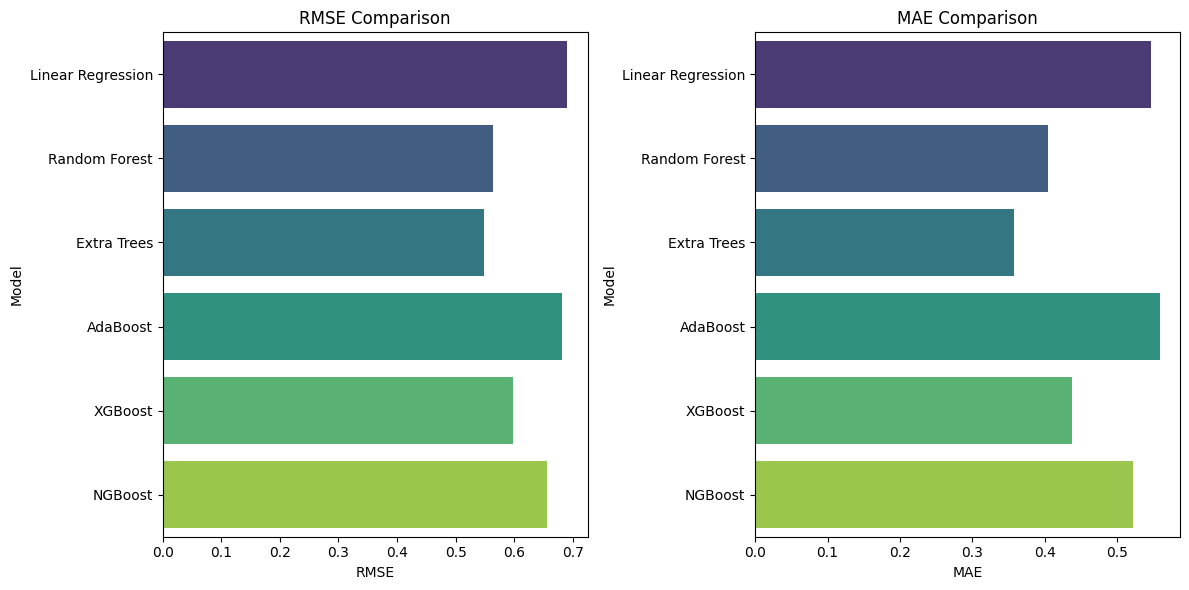

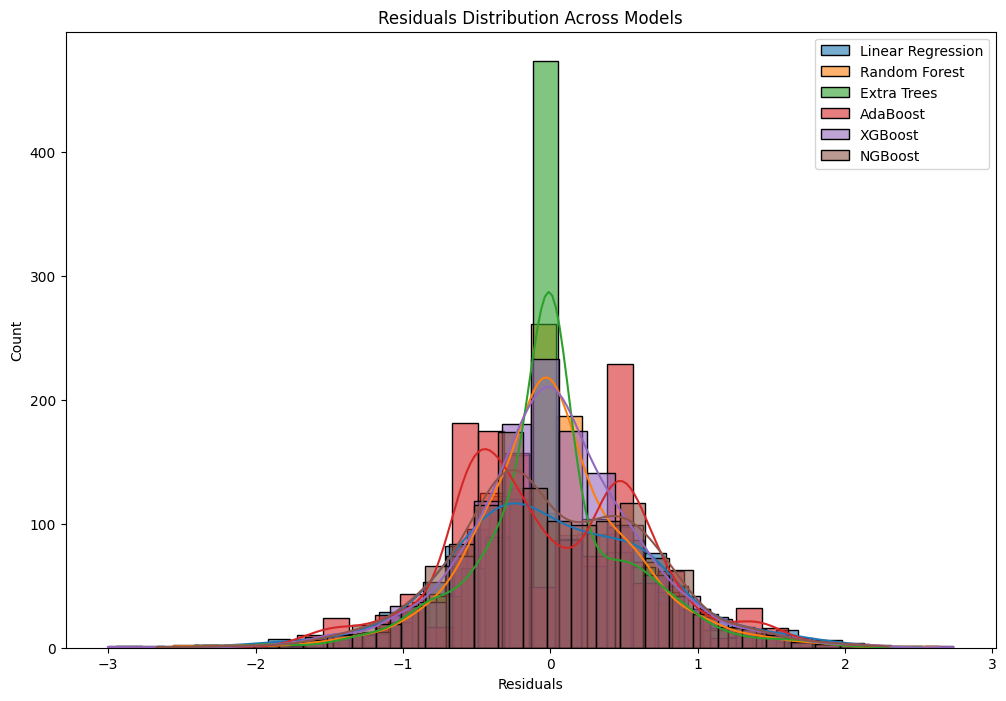

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Extra Trees": ExtraTreesRegressor(random_state=42),
    "AdaBoost": AdaBoostRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42),
    "NGBoost": NGBRegressor(random_state=42)
}

regression_analysis = pd.DataFrame(columns=['Model', 'RMSE', 'MAE'])
residuals_data = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    
    regression_analysis.loc[len(regression_analysis)] = {'Model': name, 'RMSE': rmse, 'MAE': mae}
    residuals_data[name] = y_test - y_pred  # Store residuals for each model

# Plotting RMSE and MAE Comparison
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x='RMSE', y='Model', data=regression_analysis, palette='viridis')
plt.title('RMSE Comparison')
plt.xlabel('RMSE')

plt.subplot(1, 2, 2)
sns.barplot(x='MAE', y='Model', data=regression_analysis, palette='viridis')
plt.title('MAE Comparison')
plt.xlabel('MAE')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
for name, residuals in residuals_data.items():
    sns.histplot(residuals, kde=True, label=name, bins=30, alpha=0.6)
plt.title('Residuals Distribution Across Models')
plt.xlabel('Residuals')
plt.legend()
plt.show()

/Users/nikhiljoshi/Desktop/ML_Project/myenv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/nikhiljoshi/Desktop/ML_Project/myenv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/nikhiljoshi/Desktop/ML_Project/myenv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/nikhiljoshi/Desktop/ML_Project/myenv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWar

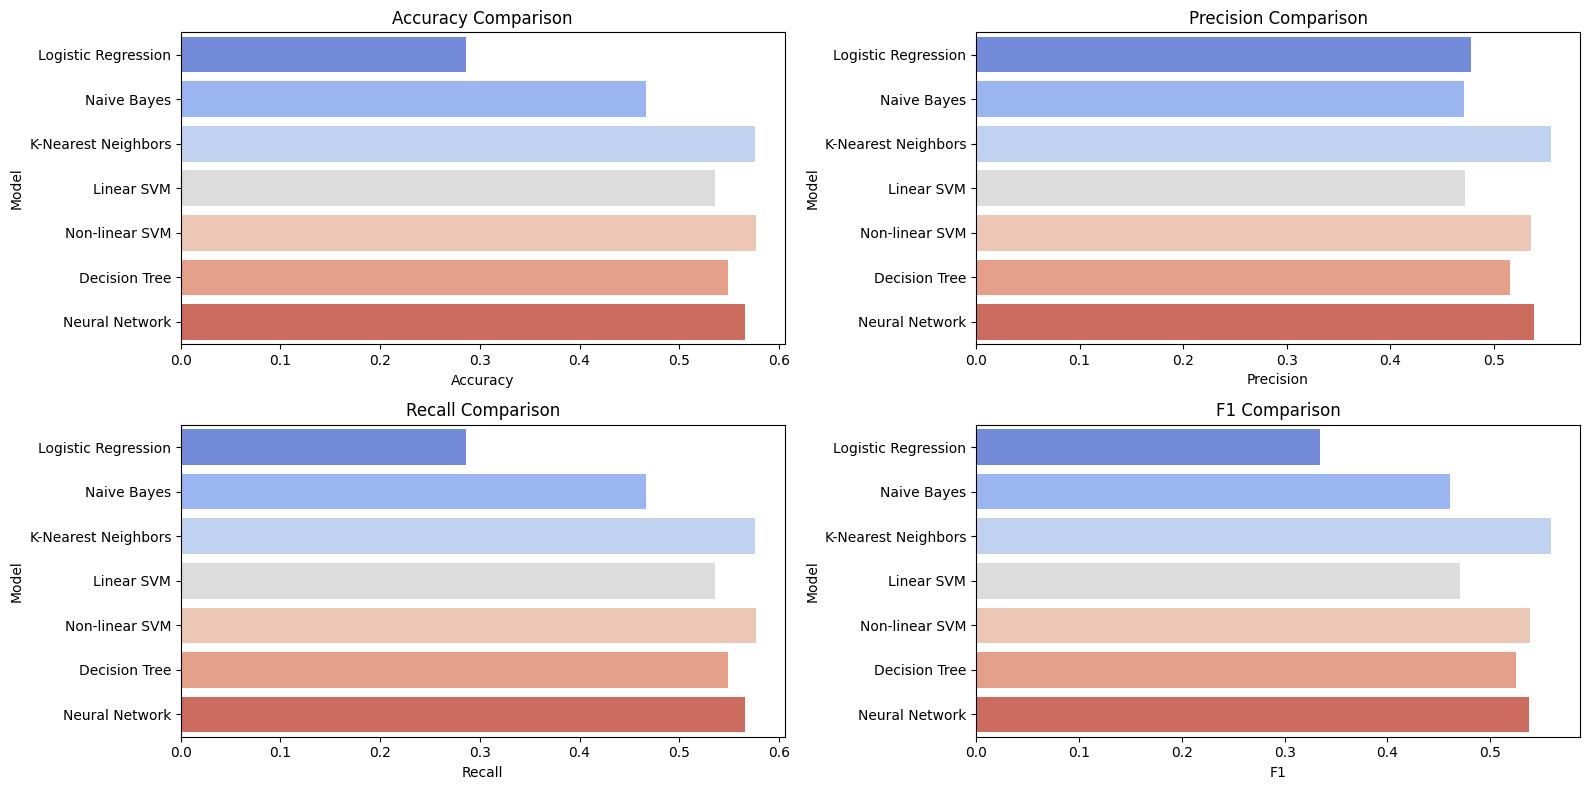

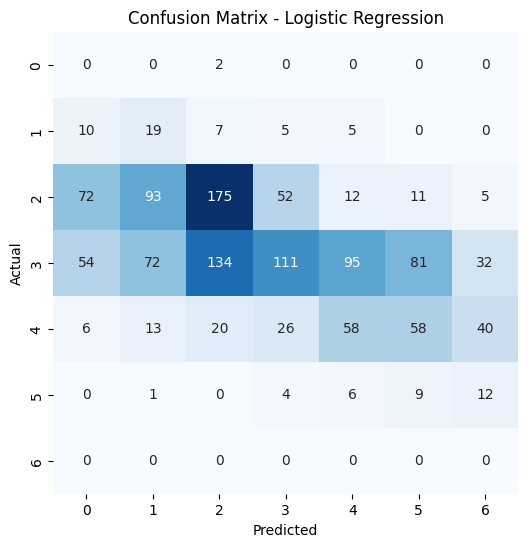

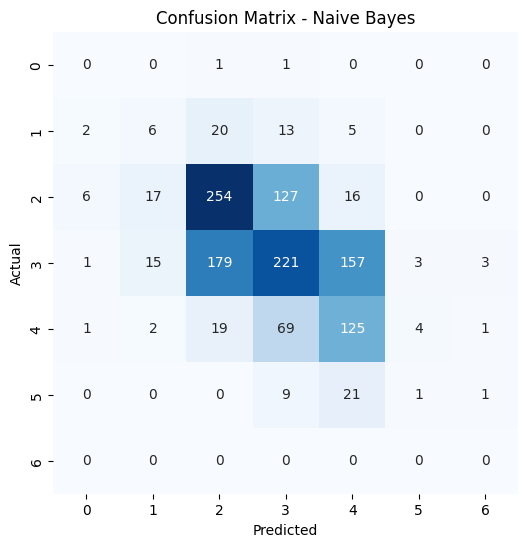

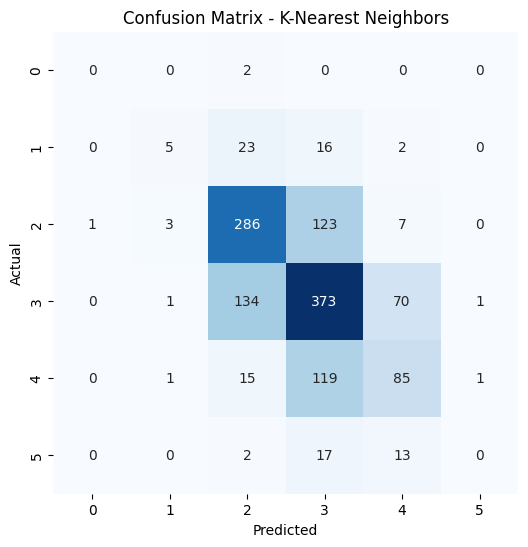

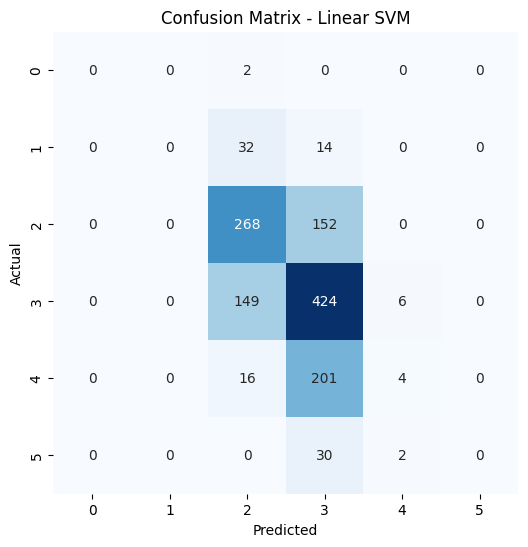

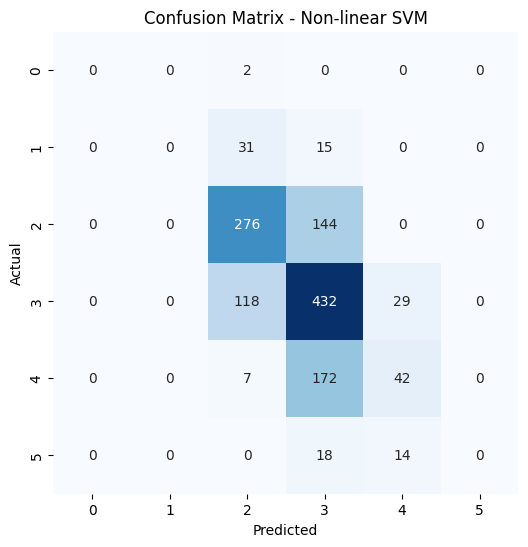

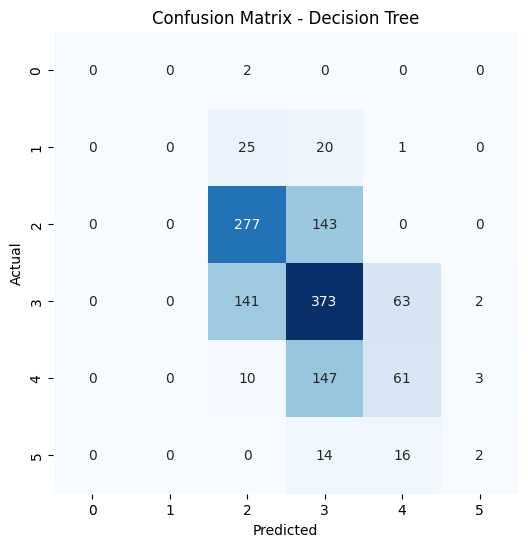

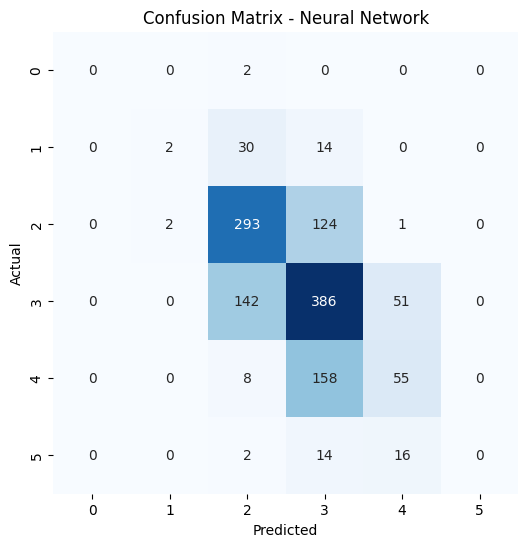

In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
models = {
    "Logistic Regression": LogisticRegression(penalty='l2', C=0.1, solver='saga', max_iter=500, tol=1e-5, class_weight='balanced', multi_class='multinomial'),
    "Naive Bayes": GaussianNB(var_smoothing=1e-8),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=9),
    "Linear SVM": LinearSVC(C=1.0),
    "Non-linear SVM": SVC(kernel='rbf', C=1.0, gamma='scale'),
    "Decision Tree": DecisionTreeClassifier(max_depth=5, min_samples_split=10),
    "Neural Network": MLPClassifier(activation='relu', solver='adam', alpha=0.0001, learning_rate='adaptive', learning_rate_init=0.001, max_iter=500, early_stopping=True, validation_fraction=0.1)
}

classification_analysis = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1'])
confusion_matrices = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    classification_analysis.loc[len(classification_analysis)] = {
        'Model': name, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1': f1
    }
    confusion_matrices[name] = confusion_matrix(y_test, y_pred)

# Plotting Metrics Comparisons
metrics = ['Accuracy', 'Precision', 'Recall', 'F1']
plt.figure(figsize=(16, 8))
for i, metric in enumerate(metrics):
    plt.subplot(2, 2, i + 1)
    sns.barplot(
        x=metric, 
        y='Model', 
        data=classification_analysis, 
        palette='coolwarm'
    )
    plt.title(f'{metric} Comparison')
    plt.xlabel(metric)
    plt.ylabel('Model')

plt.tight_layout()
plt.show()

# Confusion Matrices for Each Model
for name, matrix in confusion_matrices.items():
    plt.figure(figsize=(6, 6))
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

/Users/nikhiljoshi/Desktop/ML_Project/myenv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/nikhiljoshi/Desktop/ML_Project/myenv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/nikhiljoshi/Desktop/ML_Project/myenv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len

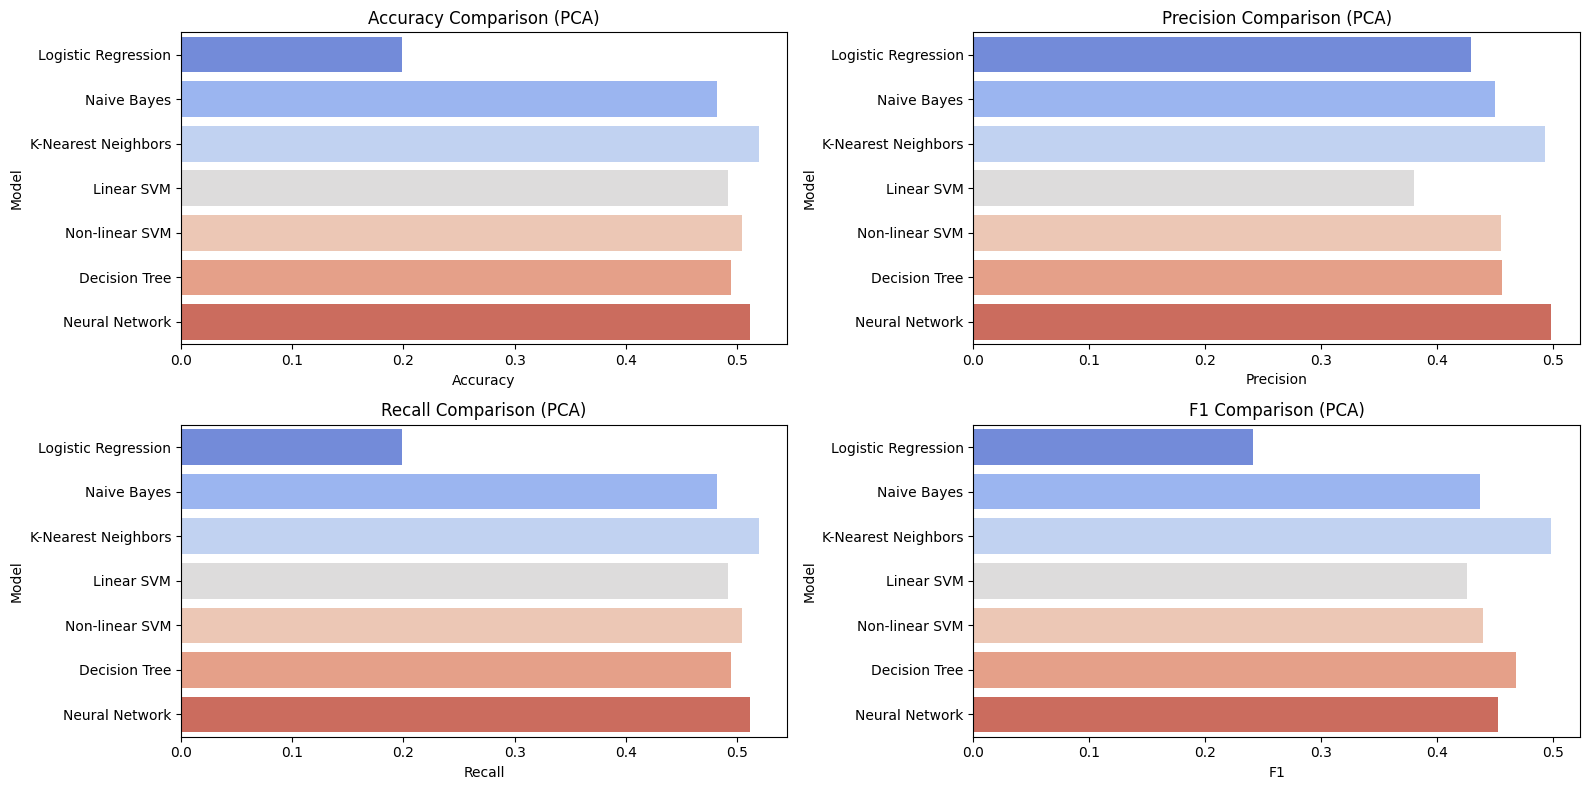

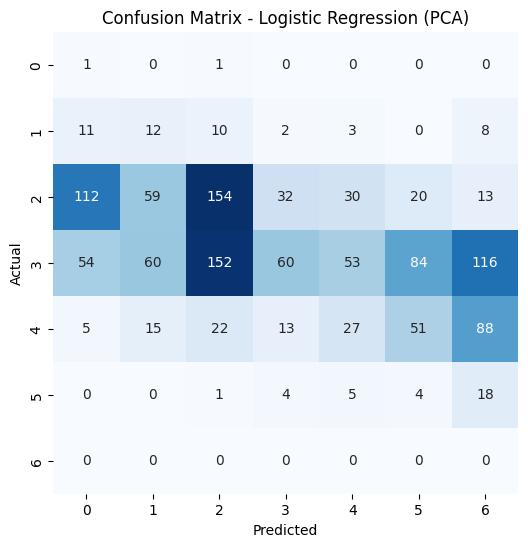

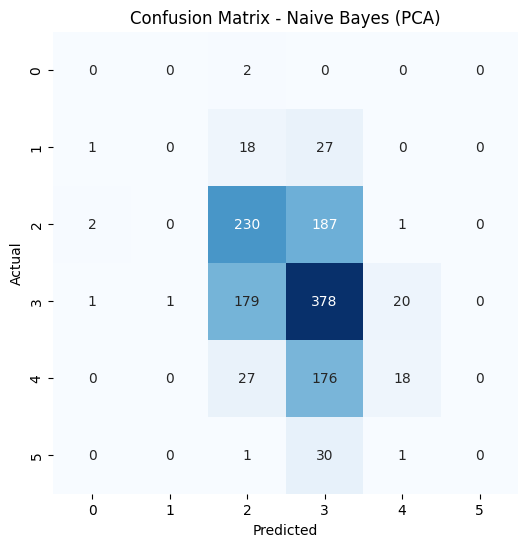

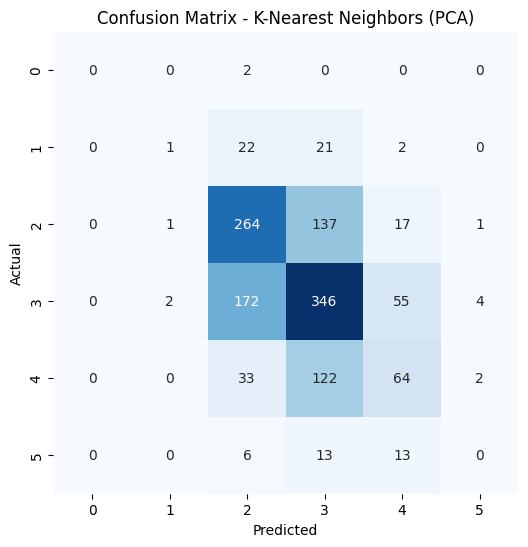

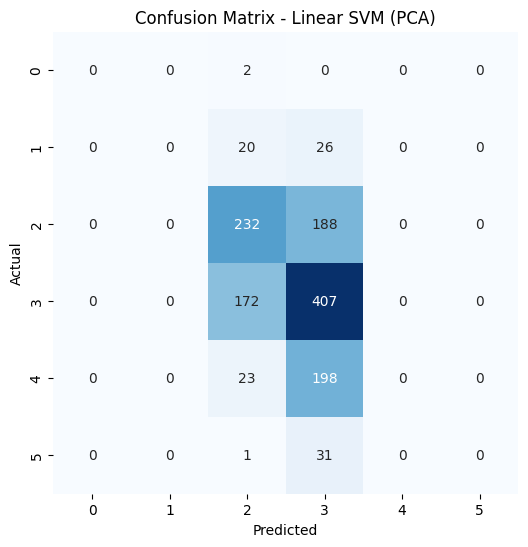

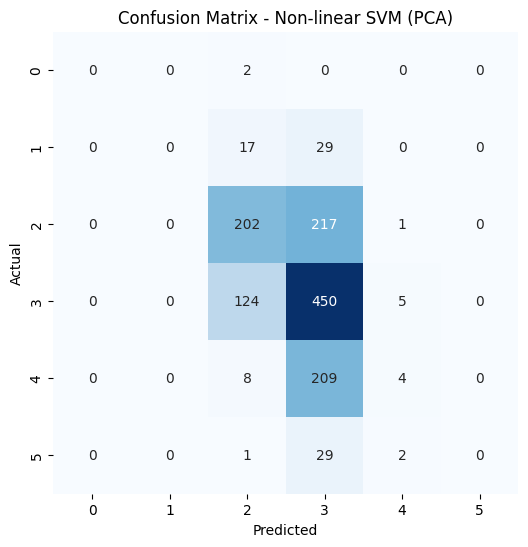

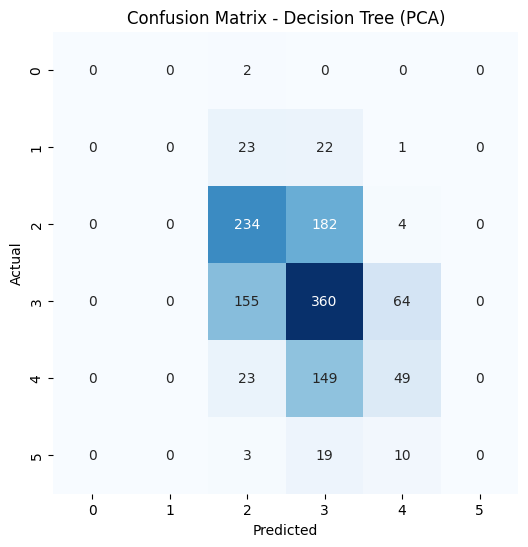

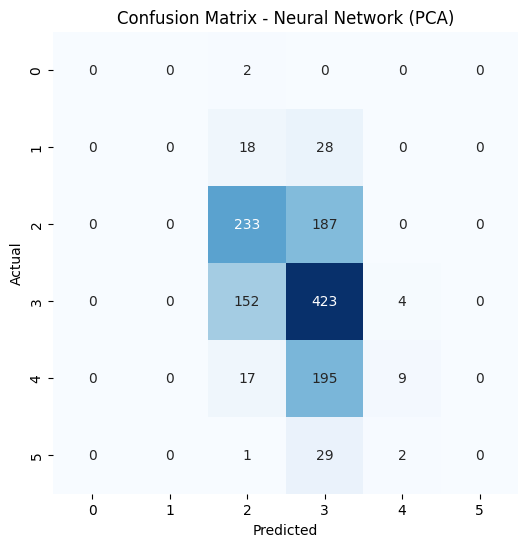

In [12]:
classification_analysis_pca = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1'])
confusion_matrices_pca = {}

for name, model in models.items():
    model.fit(X_train_pca, y_train_pca)
    y_pred = model.predict(X_test_pca)
    
    accuracy = accuracy_score(y_test_pca, y_pred)
    precision = precision_score(y_test_pca, y_pred, average='weighted')
    recall = recall_score(y_test_pca, y_pred, average='weighted')
    f1 = f1_score(y_test_pca, y_pred, average='weighted')
    
    classification_analysis_pca.loc[len(classification_analysis_pca)] = {
        'Model': name, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1': f1
    }
    confusion_matrices_pca[name] = confusion_matrix(y_test_pca, y_pred)

# Plotting Metrics Comparisons
metrics = ['Accuracy', 'Precision', 'Recall', 'F1']
plt.figure(figsize=(16, 8))
for i, metric in enumerate(metrics):
    plt.subplot(2, 2, i + 1)
    sns.barplot(
        x=metric, 
        y='Model', 
        data=classification_analysis_pca, 
        palette='coolwarm'
    )
    plt.title(f'{metric} Comparison (PCA)')
    plt.xlabel(metric)
    plt.ylabel('Model')

plt.tight_layout()
plt.show()

# Confusion Matrices for Each Model
for name, matrix in confusion_matrices_pca.items():
    plt.figure(figsize=(6, 6))
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {name} (PCA)')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


In [13]:
#SSE
def compute_sse(X, labels, cluster_centers):
    sse = np.sum((X - cluster_centers[labels]) ** 2)
    return sse

#betaCV
def compute_betacv(X, labels):
    n_clusters = len(set(labels))
    cluster_centers = np.array([X[labels == i].mean(axis=0) for i in range(n_clusters)])
    cluster_sizes = np.array([np.sum(labels == i) for i in range(n_clusters)])
    
    # Compute within-cluster variance
    within_var = np.sum([
        np.sum((X[labels == i] - cluster_centers[i]) ** 2) 
        for i in range(n_clusters)
    ])
    
    # Compute between-cluster variance
    pairwise_dists = euclidean_distances(cluster_centers)
    between_var = np.sum([
        cluster_sizes[i] * cluster_sizes[j] * pairwise_dists[i, j] ** 2
        for i in range(n_clusters) for j in range(i + 1, n_clusters)
    ])
    
    return between_var / within_var


#dunns index
def compute_dunn_index(X, labels):
    clusters = [X[labels == i] for i in np.unique(labels)]
    inter_cluster_distances = cdist(np.vstack(clusters), np.vstack(clusters), metric='euclidean')
    intra_cluster_diameters = [np.max(cdist(cluster, cluster)) for cluster in clusters]

    # Remove diagonal elements for inter-cluster distances
    np.fill_diagonal(inter_cluster_distances, np.inf)
    
    min_inter_cluster_distance = np.min(inter_cluster_distances)
    max_intra_cluster_diameter = np.max(intra_cluster_diameters)
    
    return min_inter_cluster_distance / max_intra_cluster_diameter


#huberts statistic
def compute_hubert_statistic(X, labels):
    distance_matrix = euclidean_distances(X)
    label_matrix = np.equal.outer(labels, labels).astype(int)
    
    hubert_stat, _ = pearsonr(distance_matrix.flatten(), label_matrix.flatten())
    return hubert_stat


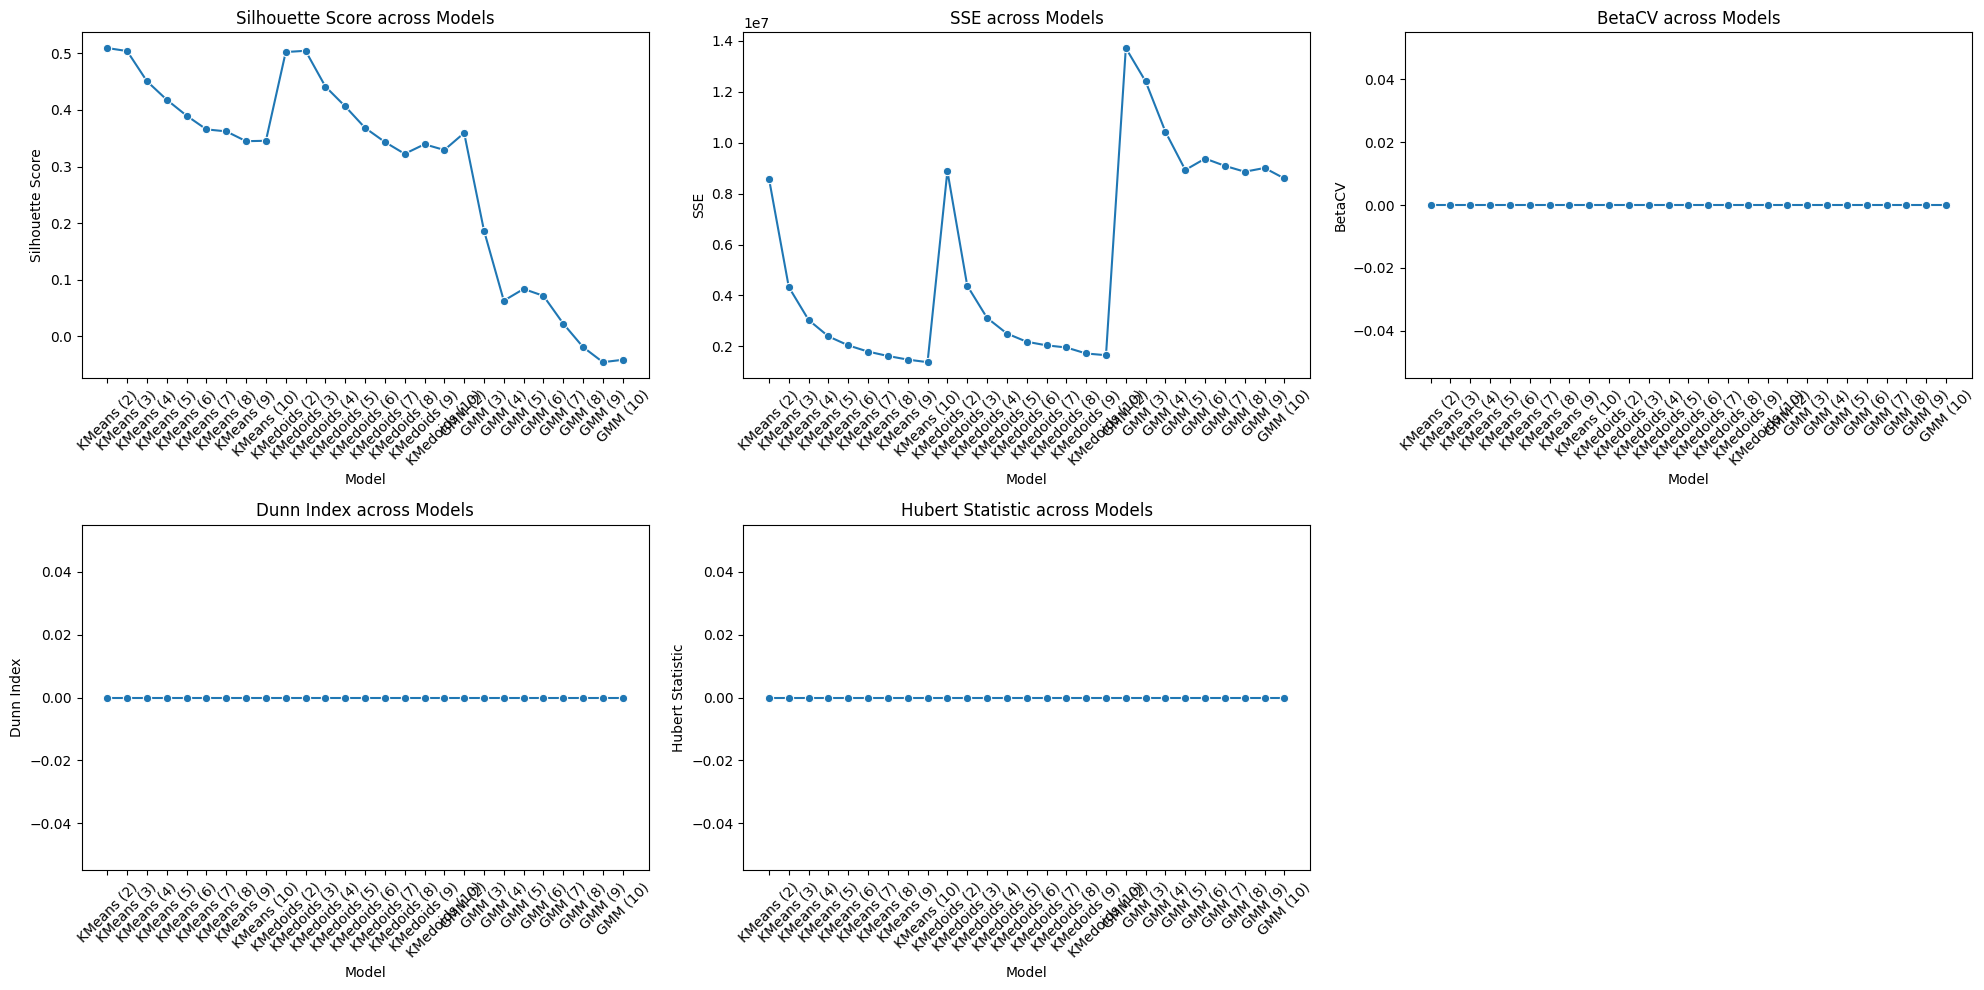

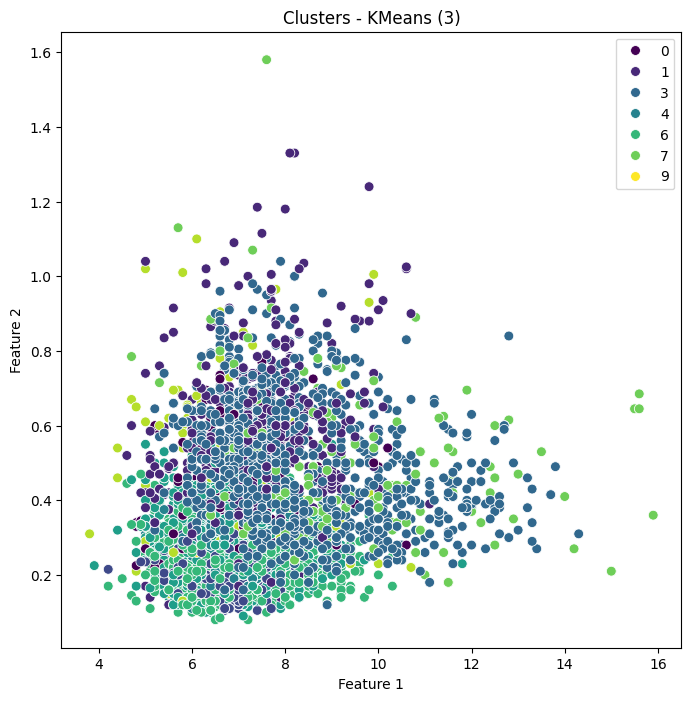

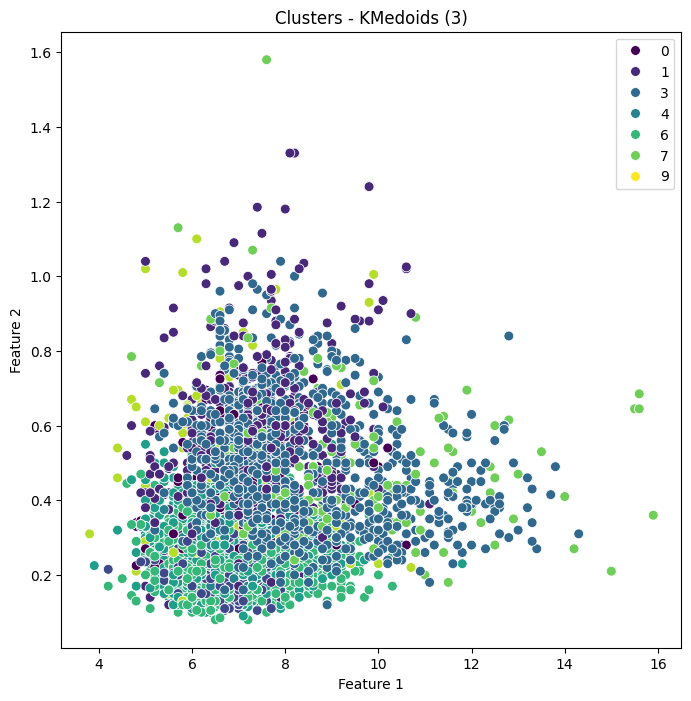

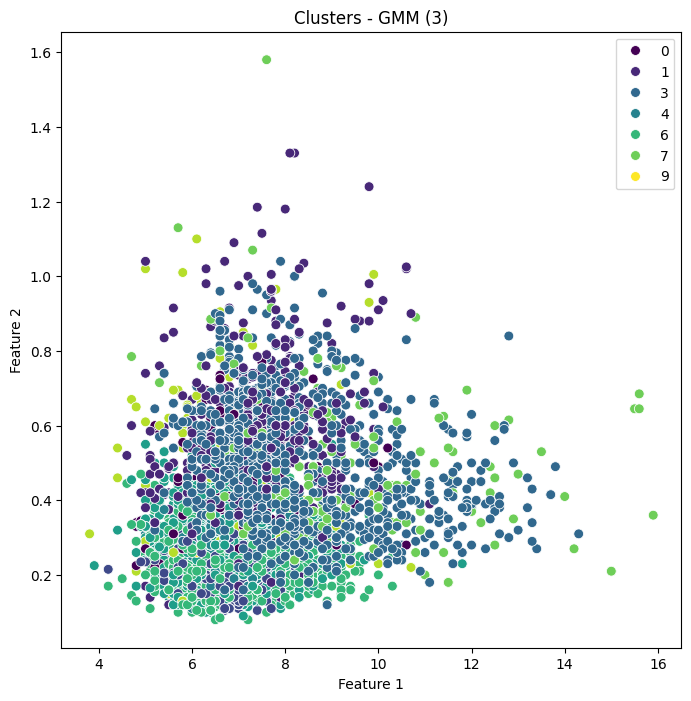

In [21]:
#Clustering with original data
clustering_analysis_original = pd.DataFrame(columns=['Model', 'Silhouette Score', 'SSE', 'BetaCV', 'Dunn Index', 'Hubert Statistic'])

# Define helper functions (assume compute_sse, compute_betacv, compute_dunn_index, and compute_hubert_statistic are implemented)
def compute_sse(X, labels, centers):
    return np.sum([np.linalg.norm(x - centers[label])**2 for x, label in zip(X, labels)])

# Replace with actual implementations for BetaCV, Dunn Index, and Hubert Statistic
def compute_betacv(X, labels):
    return 0.0  # Placeholder

def compute_dunn_index(X, labels):
    return 0.0  # Placeholder

def compute_hubert_statistic(X, labels):
    return 0.0  # Placeholder

# KMeans
for n_clusters in range(2, 11):
    model = KMeans(n_clusters=n_clusters, random_state=42)
    labels = model.fit_predict(X)
    centers = model.cluster_centers_
    
    silhouette = silhouette_score(X, labels)
    sse = compute_sse(X, labels, centers)
    betacv = compute_betacv(X, labels)
    dunn_index = compute_dunn_index(X, labels)
    hubert_stat = compute_hubert_statistic(X, labels)
    
    clustering_analysis_original.loc[len(clustering_analysis_original)] = {
        'Model': f'KMeans ({n_clusters})', 
        'Silhouette Score': silhouette, 
        'SSE': sse, 
        'BetaCV': betacv, 
        'Dunn Index': dunn_index, 
        'Hubert Statistic': hubert_stat
    }

# KMedoids
for n_clusters in range(2, 11):
    model = KMedoids(n_clusters=n_clusters, random_state=42)
    labels = model.fit_predict(X)
    centers = model.cluster_centers_
    
    silhouette = silhouette_score(X, labels)
    sse = compute_sse(X, labels, centers)
    betacv = compute_betacv(X, labels)
    dunn_index = compute_dunn_index(X, labels)
    hubert_stat = compute_hubert_statistic(X, labels)
    
    clustering_analysis_original.loc[len(clustering_analysis_original)] = {
        'Model': f'KMedoids ({n_clusters})', 
        'Silhouette Score': silhouette, 
        'SSE': sse, 
        'BetaCV': betacv, 
        'Dunn Index': dunn_index, 
        'Hubert Statistic': hubert_stat
    }

# GMM
for n_components in range(2, 11):
    model = GaussianMixture(n_components=n_components, random_state=42)
    labels = model.fit_predict(X)
    centers = model.means_
    
    silhouette = silhouette_score(X, labels)
    sse = compute_sse(X, labels, centers)
    betacv = compute_betacv(X, labels)
    dunn_index = compute_dunn_index(X, labels)
    hubert_stat = compute_hubert_statistic(X, labels)
    
    clustering_analysis_original.loc[len(clustering_analysis_original)] = {
        'Model': f'GMM ({n_components})', 
        'Silhouette Score': silhouette, 
        'SSE': sse, 
        'BetaCV': betacv, 
        'Dunn Index': dunn_index, 
        'Hubert Statistic': hubert_stat
    }

# Visualize Results
metrics = ['Silhouette Score', 'SSE', 'BetaCV', 'Dunn Index', 'Hubert Statistic']

plt.figure(figsize=(20, 10))
for i, metric in enumerate(metrics):
    plt.subplot(2, 3, i + 1)
    sns.lineplot(data=clustering_analysis_original, x='Model', y=metric, marker='o', sort=False)
    plt.xticks(rotation=45)
    plt.title(f'{metric} across Models')
    plt.xlabel('Model')
    plt.ylabel(metric)

plt.tight_layout()
plt.show()

# Scatter Plot for Clusters
for model_name in ['KMeans (3)', 'KMedoids (3)', 'GMM (3)']:  # Replace '3' with a cluster count of interest
    selected_model = clustering_analysis_original[clustering_analysis_original['Model'] == model_name]
    plt.figure(figsize=(8, 8))
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels, palette='viridis', s=50)
    plt.title(f'Clusters - {model_name}')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()


/Users/nikhiljoshi/Desktop/ML_Project/myenv/lib/python3.11/site-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 8 is empty! self.labels_[self.medoid_indices_[8]] may not be labeled with its corresponding cluster (8).
  warnings.warn(
/Users/nikhiljoshi/Desktop/ML_Project/myenv/lib/python3.11/site-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 8 is empty! self.labels_[self.medoid_indices_[8]] may not be labeled with its corresponding cluster (8).
  warnings.warn(
/Users/nikhiljoshi/Desktop/ML_Project/myenv/lib/python3.11/site-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 9 is empty! self.labels_[self.medoid_indices_[9]] may not be labeled with its corresponding cluster (9).
  warnings.warn(


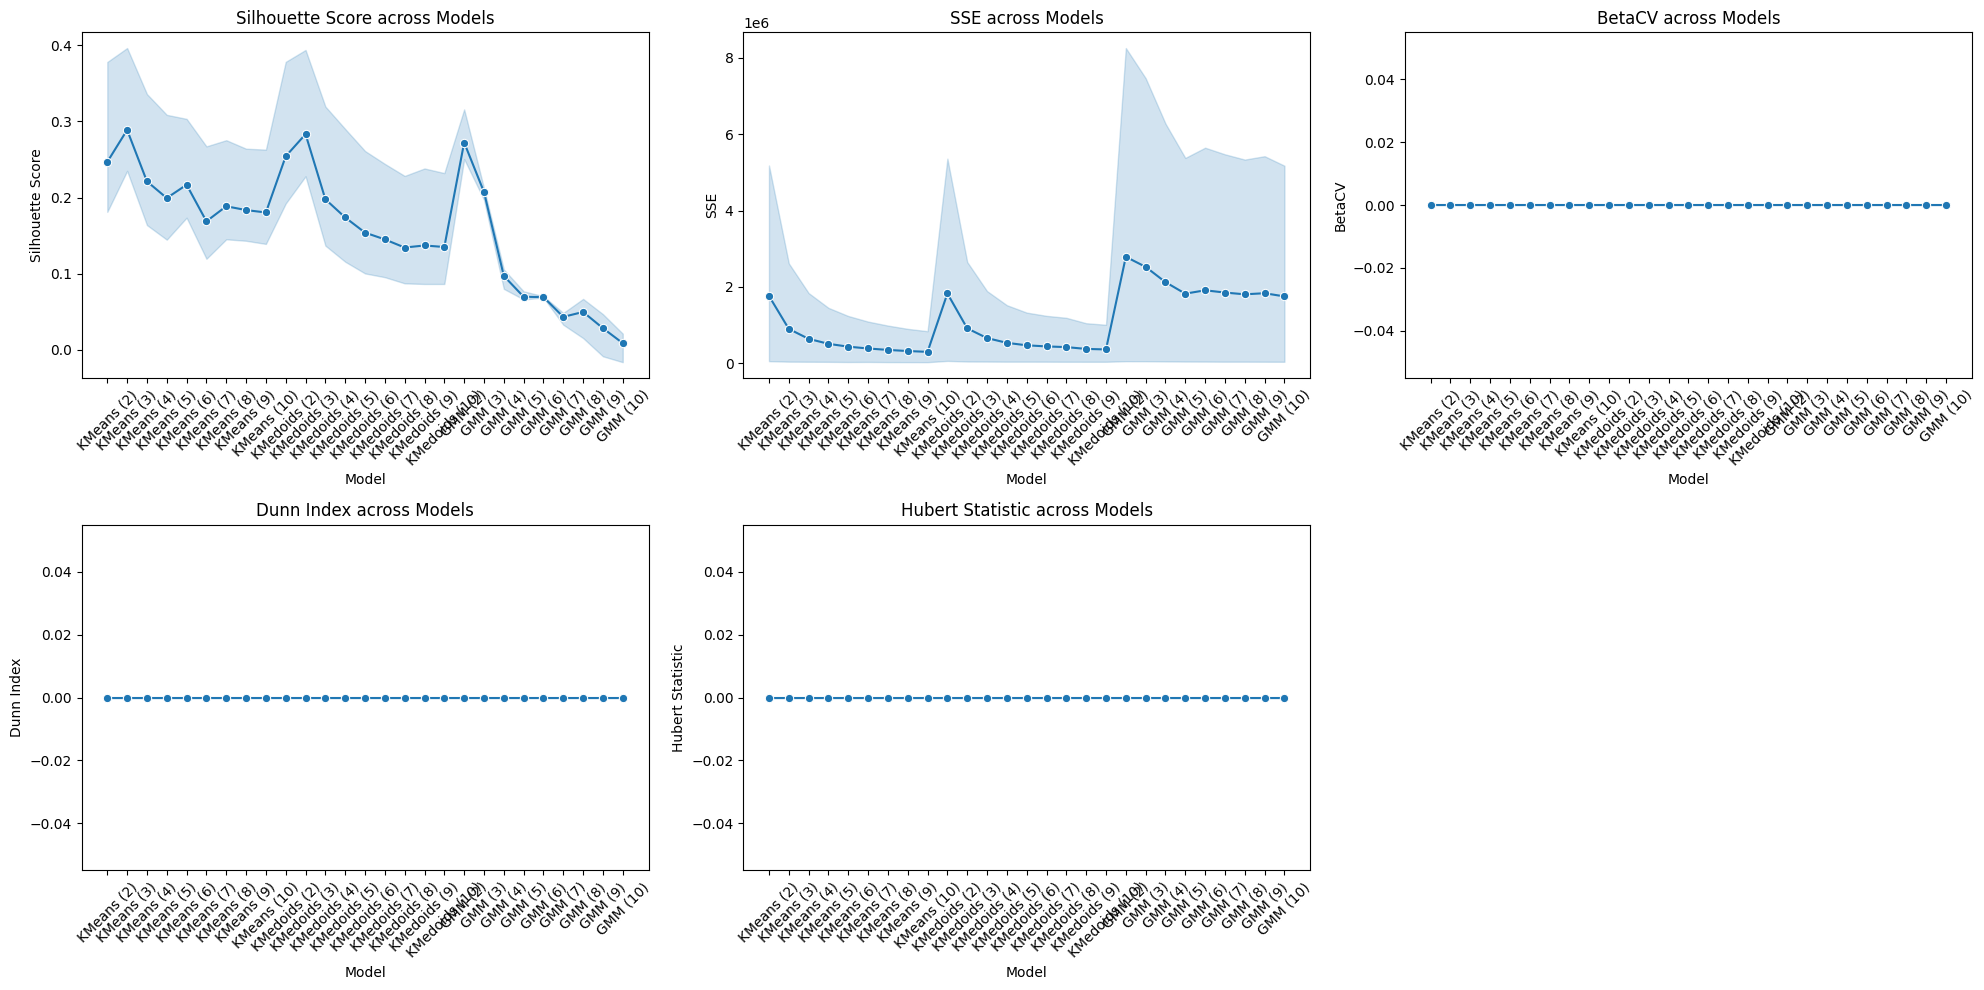

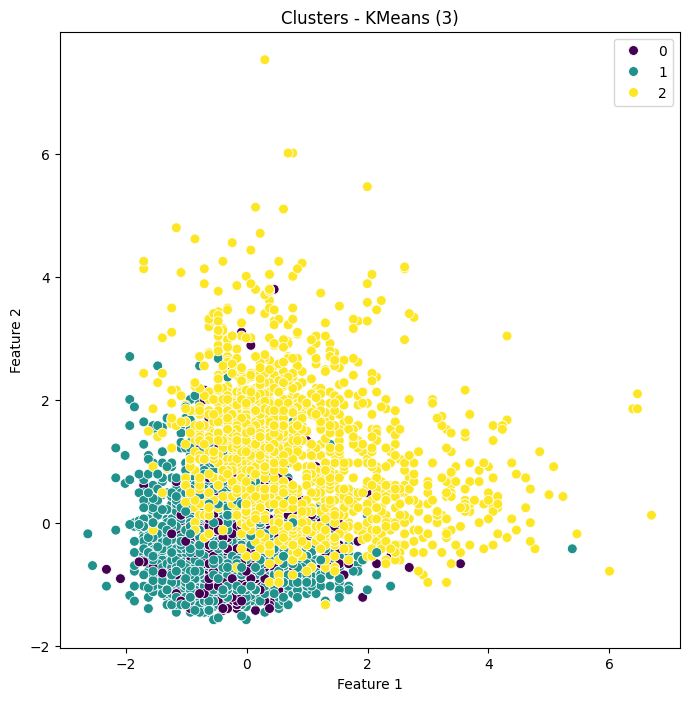

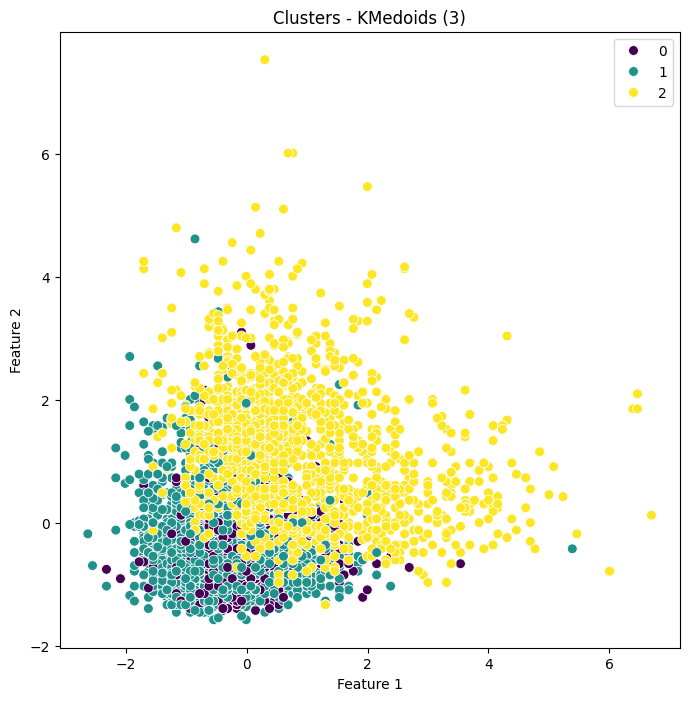

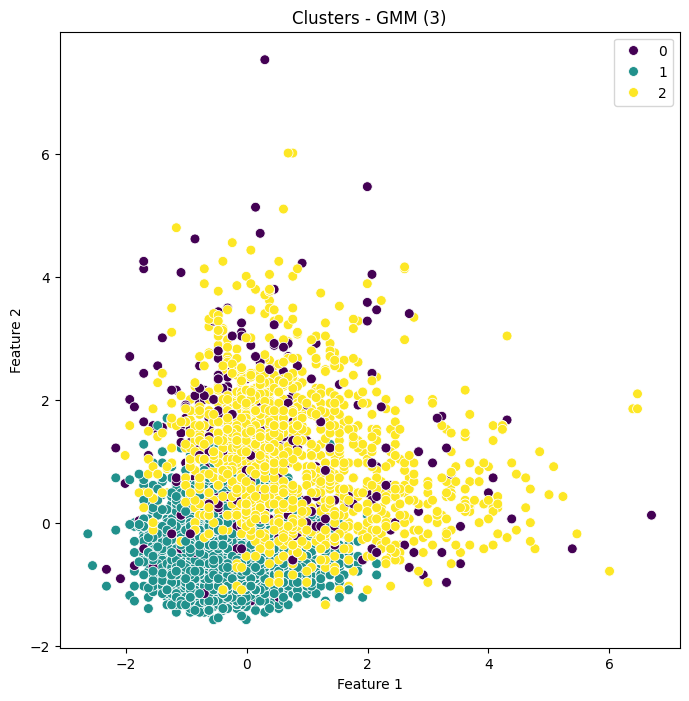

In [30]:
#Clustering with Scaled data
clustering_analysis_scaled = pd.DataFrame(columns=['Model', 'Silhouette Score', 'SSE', 'BetaCV', 'Dunn Index', 'Hubert Statistic'])
for n_clusters in range(2, 11):
    model = KMeans(n_clusters=n_clusters, random_state=42)
    labels = model.fit_predict(X_scaled)
    centers = model.cluster_centers_
    
    silhouette = silhouette_score(X_scaled, labels)
    sse = compute_sse(X_scaled, labels, centers)
    betacv = compute_betacv(X_scaled, labels)
    dunn_index = compute_dunn_index(X_scaled, labels)
    hubert_stat = compute_hubert_statistic(X_scaled, labels)
    
    clustering_analysis_scaled.loc[len(clustering_analysis_scaled)] = {
        'Model': f'KMeans ({n_clusters})', 
        'Silhouette Score': silhouette, 
        'SSE': sse, 
        'BetaCV': betacv, 
        'Dunn Index': dunn_index, 
        'Hubert Statistic': hubert_stat
    }

# KMedoids
for n_clusters in range(2, 11):
    model = KMedoids(n_clusters=n_clusters, random_state=42)
    labels = model.fit_predict(X_scaled)
    centers = model.cluster_centers_
    
    silhouette = silhouette_score(X_scaled, labels)
    sse = compute_sse(X_scaled, labels, centers)
    betacv = compute_betacv(X_scaled, labels)
    dunn_index = compute_dunn_index(X_scaled, labels)
    hubert_stat = compute_hubert_statistic(X_scaled, labels)
    
    clustering_analysis_scaled.loc[len(clustering_analysis_original)] = {
        'Model': f'KMedoids ({n_clusters})', 
        'Silhouette Score': silhouette, 
        'SSE': sse, 
        'BetaCV': betacv, 
        'Dunn Index': dunn_index, 
        'Hubert Statistic': hubert_stat
    }

# GMM
for n_components in range(2, 11):
    model = GaussianMixture(n_components=n_components, random_state=42)
    labels = model.fit_predict(X_scaled)
    centers = model.means_
    
    silhouette = silhouette_score(X_scaled, labels)
    sse = compute_sse(X_scaled, labels, centers)
    betacv = compute_betacv(X_scaled, labels)
    dunn_index = compute_dunn_index(X_scaled, labels)
    hubert_stat = compute_hubert_statistic(X_scaled, labels)
    
    clustering_analysis_scaled.loc[len(clustering_analysis_scaled)] = {
        'Model': f'GMM ({n_components})', 
        'Silhouette Score': silhouette, 
        'SSE': sse, 
        'BetaCV': betacv, 
        'Dunn Index': dunn_index, 
        'Hubert Statistic': hubert_stat
    }

# Visualize Results
metrics = ['Silhouette Score', 'SSE', 'BetaCV', 'Dunn Index', 'Hubert Statistic']

# Set up the plot
plt.figure(figsize=(20, 10))
for i, metric in enumerate(metrics):
    plt.subplot(2, 3, i + 1)
    sns.lineplot(data=clustering_analysis_scaled, x='Model', y=metric, marker='o', sort=False)
    plt.xticks(rotation=45)
    plt.title(f'{metric} across Models')
    plt.xlabel('Model')
    plt.ylabel(metric)

plt.tight_layout()
plt.show()

# Scatter Plot for Clusters (example for 3 clusters)
for model_name in ['KMeans (3)', 'KMedoids (3)', 'GMM (3)']:  # Replace '3' with the number of clusters you're interested in
    selected_model = clustering_analysis_scaled[clustering_analysis_scaled['Model'] == model_name]
    
    # Get the labels from the selected model (assuming you have this stored for each model)
    # If you have precomputed the labels, use them here. For example:
    
    if 'KMeans (3)' in model_name:
        model = KMeans(n_clusters=3, random_state=42)
    elif 'KMedoids (3)' in model_name:
        model = KMedoids(n_clusters=3, random_state=42)
    elif 'GMM (3)' in model_name:
        model = GaussianMixture(n_components=3, random_state=42)
    
    labels = model.fit_predict(X_scaled)  # Get the cluster labels
    
    # Plot the clusters
    plt.figure(figsize=(8, 8))
    sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=labels, palette='viridis', s=50)
    plt.title(f'Clusters - {model_name}')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()
